<a href="https://colab.research.google.com/github/jaivanti/syracuse/blob/main/Upscaling_SSIM%20and%20PSNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import cv2

In [18]:
!pip install opencv-contrib-python==4.3.0.36

In [19]:
from cv2 import dnn_superres

In [20]:

sr = dnn_superres.DnnSuperResImpl_create()

In [21]:
image = cv2.imread('/content/drive/MyDrive/tpf/upscaled.png')


In [22]:
path = '/content/drive/MyDrive/SR CDN/ESPCN_x3.pb'

In [23]:
sr.readModel(path)

In [24]:
sr.setModel("espcn", 3)

In [25]:
result = sr.upsample(image)

In [26]:
cv2.imwrite("/content/drive/MyDrive/tpf/upscaled_new.png", result)

True

In [27]:
#PSNR CALCULATED
from math import log10, sqrt
import cv2
import numpy as np

def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): # MSE is zero means no noise is present in the signal .
				# Therefore PSNR have no importance.
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def main():
	original = cv2.imread("/content/drive/MyDrive/tpf/upscaled.png")
	compressed = cv2.imread("/content/drive/MyDrive/tpf/resized.png", 1)
	value = PSNR(original, compressed)
	print(f"PSNR value is {value} dB")
	
if __name__ == "__main__":
	main()


PSNR value is 40.98656430786037 dB


In [28]:
img = cv2.imread("/content/drive/MyDrive/tpf/frame0.jpg")

In [29]:
img.shape[0]

180

In [30]:
from google.colab.patches import cv2_imshow

Resized Dimensions :  (540, 960, 3)


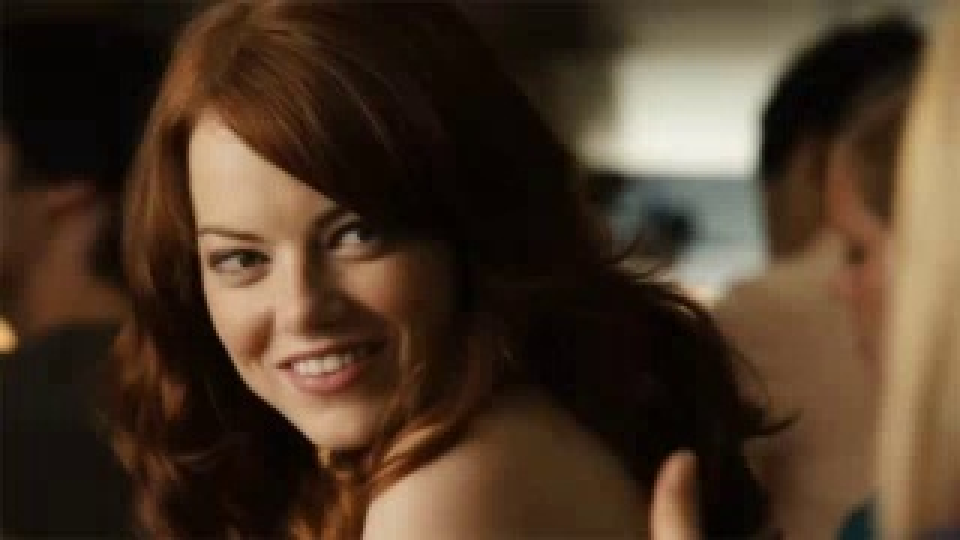

In [31]:
#resizing

scale_percent = 300 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
cv2_imshow(resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

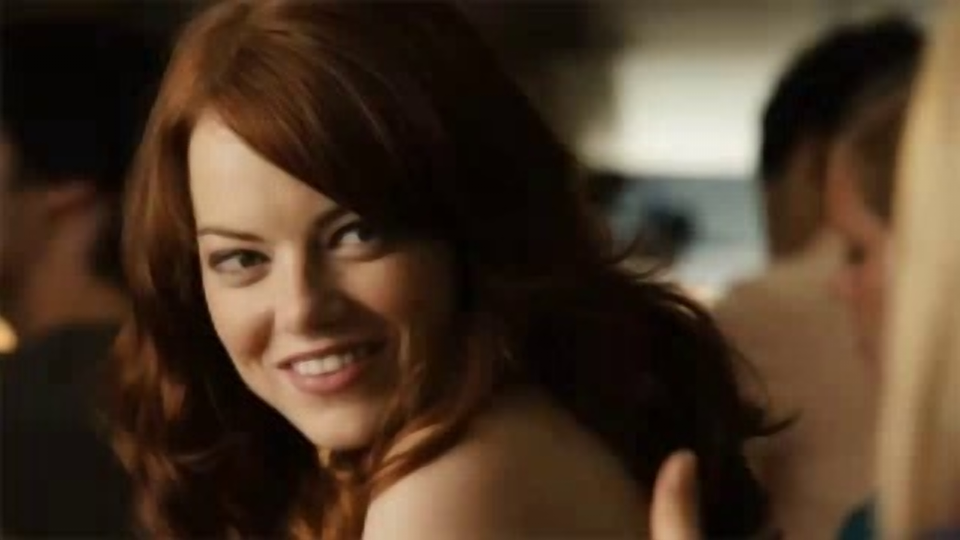

In [32]:
img1 = cv2.imread('/content/drive/MyDrive/tpf/upscaled.png')
cv2_imshow(img1)

In [33]:
cv2.imwrite("/content/drive/MyDrive/tpf/resized.png",resized )

True

In [34]:
for i in range(5):
  name = '/content/drive/MyDrive/tpf/frame' + str(i) + '.jpg'
  print(name)

/content/drive/MyDrive/tpf/frame0.jpg
/content/drive/MyDrive/tpf/frame1.jpg
/content/drive/MyDrive/tpf/frame2.jpg
/content/drive/MyDrive/tpf/frame3.jpg
/content/drive/MyDrive/tpf/frame4.jpg


In [35]:
for i in range(31):
  name = '/content/drive/MyDrive/tpf/frame' + str(i) + '.jpg'
  image = cv2.imread(name)
  result = sr.upsample(image)
  name_f = '/content/drive/MyDrive/tpf/upscaled' + str(i) + '.png'
  cv2.imwrite(name_f, result)





In [36]:
from math import log10, sqrt
import cv2
import numpy as np

def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): # MSE is zero means no noise is present in the signal .
				# Therefore PSNR have no importance.
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def main():
	original = cv2.imread("/content/drive/MyDrive/tpf/upscaled.png")
	compressed = cv2.imread("/content/drive/MyDrive/tpf/resized.png", 1)
	value = PSNR(original, compressed)
	print(f"PSNR value is {value} dB")
	
if __name__ == "__main__":
	main()


PSNR value is 40.98656430786037 dB


In [37]:
for i in range(31):
  img = cv2.imread('/content/drive/MyDrive/tpf/frame' + str(i) + '.jpg')
  
  scale_percent = 300 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
    
  # resize image
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

  name = '/content/drive/MyDrive/tpf/resized' + str(i) + '.png'
  cv2.imwrite(name,resized )
  
  
  #print('Resized Dimensions : ',resized.shape)
  
  #cv2_imshow(resized)
  cv2.waitKey(0)
  cv2.destroyAllWindows()



In [38]:
# Resized is the compressed one. Original is the upscaled one
for i in range(31):
  name_c = '/content/drive/MyDrive/tpf/resized' + str(i) + '.png'
  compressed = cv2.imread(name_c)
  name_o = '/content/drive/MyDrive/tpf/upscaled' + str(i) + '.png'
  original = cv2.imread(name_o)
  value = PSNR(original, compressed)
  print(f"PSNR value is {value} dB")


PSNR value is 40.98656430786037 dB
PSNR value is 40.91813224977714 dB
PSNR value is 40.8628834689558 dB
PSNR value is 40.90870337737542 dB
PSNR value is 40.91229634675412 dB
PSNR value is 40.80866963620949 dB
PSNR value is 40.848513994469 dB
PSNR value is 40.82121693254638 dB
PSNR value is 40.7834224906513 dB
PSNR value is 40.81561595940222 dB
PSNR value is 40.75481610124055 dB
PSNR value is 40.58824611374058 dB
PSNR value is 40.47570046446354 dB
PSNR value is 40.386473669318306 dB
PSNR value is 40.289803383773865 dB
PSNR value is 40.252722574138254 dB
PSNR value is 40.165431886506326 dB
PSNR value is 40.15992256086917 dB
PSNR value is 40.18201804380017 dB
PSNR value is 40.18650140939539 dB
PSNR value is 40.22136577618134 dB
PSNR value is 40.23489630159345 dB
PSNR value is 40.21747880972919 dB
PSNR value is 40.24769748557226 dB
PSNR value is 40.255897754317054 dB
PSNR value is 40.273212833471504 dB
PSNR value is 40.279805814957484 dB
PSNR value is 40.27132351648274 dB
PSNR value is 40.

In [39]:

import cv2
import numpy as np
import glob

img_array = []
for i in range(31):
  name = '/content/drive/MyDrive/tpf/upscaled' + str(i) + '.png'

  for filename in glob.glob(name):
      img = cv2.imread(filename)
      height, width, layers = img.shape
      size = (width,height)
      img_array.append(img)


out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()


In [40]:
from skimage.metrics import structural_similarity as ssim

In [43]:
img1 = cv2.imread('/content/drive/MyDrive/tpf/resized14.png') 
img2 = cv2.imread('/content/drive/MyDrive/tpf/upscaled14.png')

ssim(img1, img2, multichannel=True)

0.9677881810865091

In [45]:
#SSIM
for i in range(31):
  name_c = '/content/drive/MyDrive/tpf/resized' + str(i) + '.png'
  compressed = cv2.imread(name_c)
  name_o = '/content/drive/MyDrive/tpf/upscaled' + str(i) + '.png'
  original = cv2.imread(name_o)
  value = ssim(original, compressed, multichannel=True)
  print(f"ssim value is {value} dB")

ssim value is 0.9729813233235713 dB
ssim value is 0.9724704485293749 dB
ssim value is 0.9722582296484008 dB
ssim value is 0.9720315639928203 dB
ssim value is 0.9715638304029705 dB
ssim value is 0.970809394405444 dB
ssim value is 0.9709816358399387 dB
ssim value is 0.9707229417450881 dB
ssim value is 0.9707523137087545 dB
ssim value is 0.97115411773696 dB
ssim value is 0.9709588025730272 dB
ssim value is 0.9701665433925623 dB
ssim value is 0.9697242206523615 dB
ssim value is 0.9688531088073492 dB
ssim value is 0.9677881810865091 dB
ssim value is 0.9673542424520227 dB
ssim value is 0.9669440965347871 dB
ssim value is 0.9667000436179753 dB
ssim value is 0.9669011181548361 dB
ssim value is 0.9669360752772981 dB
ssim value is 0.9672584038385111 dB
ssim value is 0.9674261786806798 dB
ssim value is 0.9674197930311069 dB
ssim value is 0.9674299332331677 dB
ssim value is 0.967421411928457 dB
ssim value is 0.9676460730288551 dB
ssim value is 0.9678139521713839 dB
ssim value is 0.9677832265006518